In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Path to the shapefile
# This is version 0.3, from May 2022
shapefile_path = '/perm/mokr/Caravans/Caravan/shapefiles/camels/camels_basin_shapes.shp'
# /perm/mokr/caravans24/usr/local/google/home/kratzert/Data/Caravan-csv/Caravan/shapefiles
# Load the shapefile using geopandas
Caravans_Shapefiles = gpd.read_file(shapefile_path)
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
Caravans_Shapefiles

,gauge_id,geometry
0,camels_01013500,"MULTIPOLYGON (((-68.06259 47.17901, -68.06028 ..."
1,camels_01022500,"POLYGON ((-67.97836 44.6131, -67.98141 44.6143..."
2,camels_01030500,"MULTIPOLYGON (((-68.09162 46.11477, -68.08453 ..."
3,camels_01031500,"MULTIPOLYGON (((-69.31629 45.15325, -69.32144 ..."
4,camels_01047000,"POLYGON ((-70.10847 45.21669, -70.10609 45.213..."
...,...,...
666,camels_14309500,"POLYGON ((-123.81322 42.89103, -123.81128 42.8..."
667,camels_14316700,"POLYGON ((-122.49936 43.47688, -122.49127 43.4..."
668,camels_14325000,"POLYGON ((-124.07751 42.89822, -124.06406 42.8..."
669,camels_14362250,"POLYGON ((-123.15128 42.19624, -123.14891 42.1..."


NameError: name 'world' is not defined

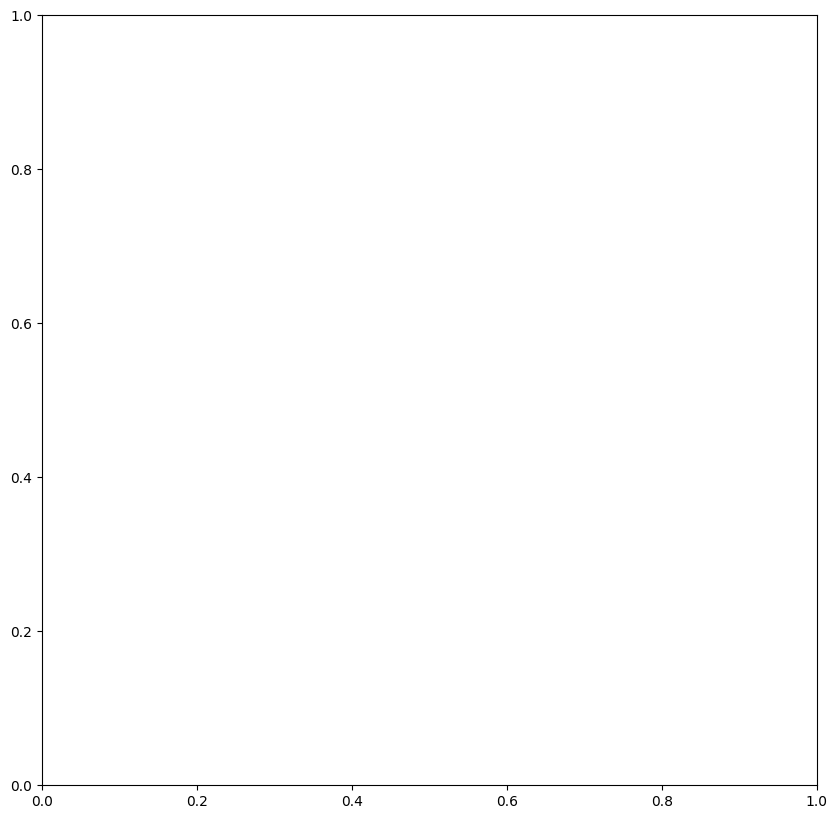

In [4]:

fig, ax = plt.subplots(figsize=(10, 10))


world.plot(ax=ax, color='lightgray', edgecolor='black')
Caravans_Shapefiles.plot(ax=ax, figsize=(10, 10), edgecolor='blue', cmap='Set1')

# Add title and show the plot
# Add title and show the plot
plt.title('Caravan Shapefiles')
plt.show()

In [ ]:
Caravans_Shapefiles['area'] = Caravans_Shapefiles['geometry'].area * (111**2)

# Print the smallest and largest areas
smallest_shape = Caravans_Shapefiles.loc[Caravans_Shapefiles['area'].idxmin()]
largest_shape = Caravans_Shapefiles.loc[Caravans_Shapefiles['area'].idxmax()]

print("Smallest Shape:")
print(smallest_shape)

print("\nLargest Shape:")
print(largest_shape)

In [5]:
sorted_areas = np.sort(Caravans_Shapefiles['area'])

# Calculate CDF
cdf = np.arange(1, len(sorted_areas)+1) / len(sorted_areas)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_areas, cdf, marker='.', linestyle='none')
plt.xlabel('Area (square degrees)')
plt.ylabel('CDF')
plt.title('CDF of Areas of Caravan Shapes')
plt.grid(True)
plt.show()


KeyError: 'area'

In [8]:
len(Caravans_Shapefiles[Caravans_Shapefiles['area'] > 500])

313

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

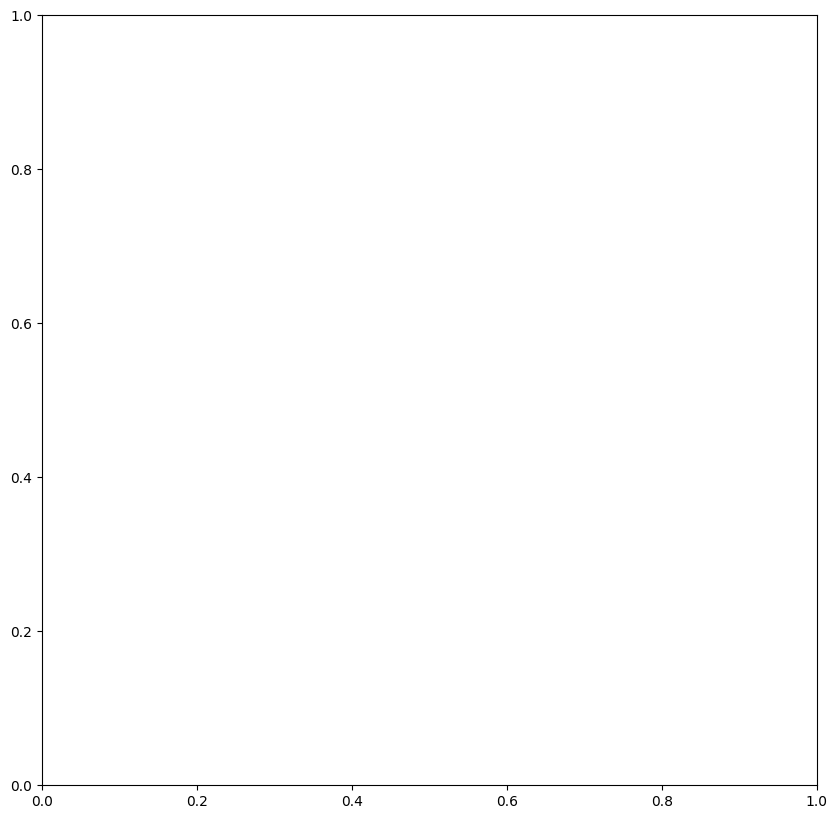

In [5]:
Big_Caravans_Shapefiles = Caravans_Shapefiles[Caravans_Shapefiles['area'] > 500]

fig, ax = plt.subplots(figsize=(10, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgray', edgecolor='black')
Big_Caravans_Shapefiles.plot(ax=ax, figsize=(10, 10), edgecolor='blue', cmap='Set1')

# Add title and show the plot
plt.title(f'Caravans Catchments larger than 500km$^{2}$')
plt.show()